# **Домашнее задание №3**
Необходимо произвести предобработку данных, обучить модели на алгоритмах, рассмотренных в уроках, оценить модели с помощью рассмотренных метрик и объяснить выбор определенной метрики.


In [53]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
                             mean_absolute_percentage_error, confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             balanced_accuracy_score, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

In [54]:
data=pd.read_csv('https://lms.skillfactory.ru/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv')
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
display(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Удаляем столбец 'Cabin', так как в нем содержится большое количество нулевых значений. Также удаляем столбцы 'Name' и 'Ticket', так как эти столбцы не несут полезной информации.

In [55]:
data=data.drop(['Cabin','Name','Ticket'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Удаляем столбец 'Age':

In [56]:
data=data.drop(['Age'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


Преобразуем строковые переменные пола в числовые:

In [57]:
d={'male':0, 'female':1}
data['Sex']=data['Sex'].apply(lambda x:d[x])
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S


# **Визуализируем данные:**

Смертность в зависимости от пола:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


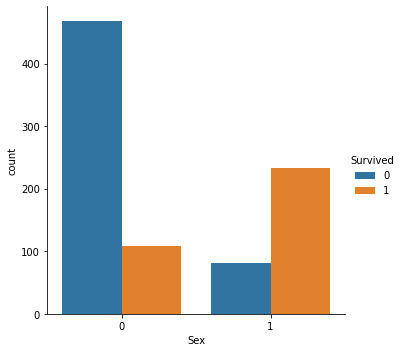

In [9]:
sns.catplot('Sex', data=data, hue='Survived', kind='count')

Таким образом, мужчины умирали чаще.
Смертность в зависимости от класса:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


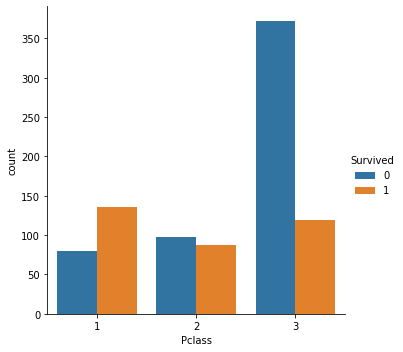

In [10]:
sns.catplot('Pclass', data=data, hue='Survived', kind='count')

Бедные умирали чаще.

Какой класс доминировал?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


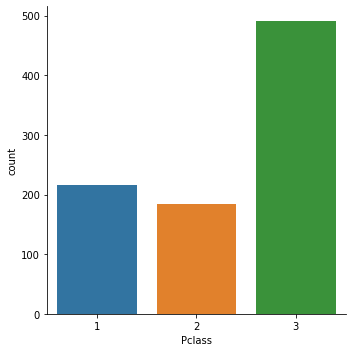

In [11]:
sns.catplot('Pclass', data=data, kind='count')

3-й класс явно доминирует.

Гендерное распределение по классам:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


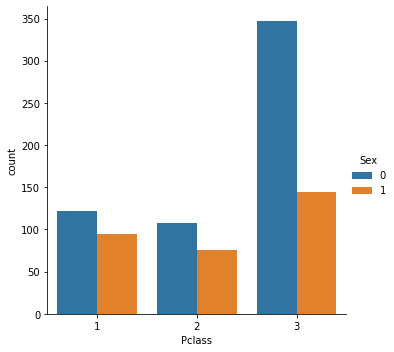

In [13]:
sns.catplot('Pclass', data=data, hue='Sex', kind='count')

Количество мужчин в разы превышало количество женщин в 3-ем классе.

Смертность в зависимости от гендера и класса:

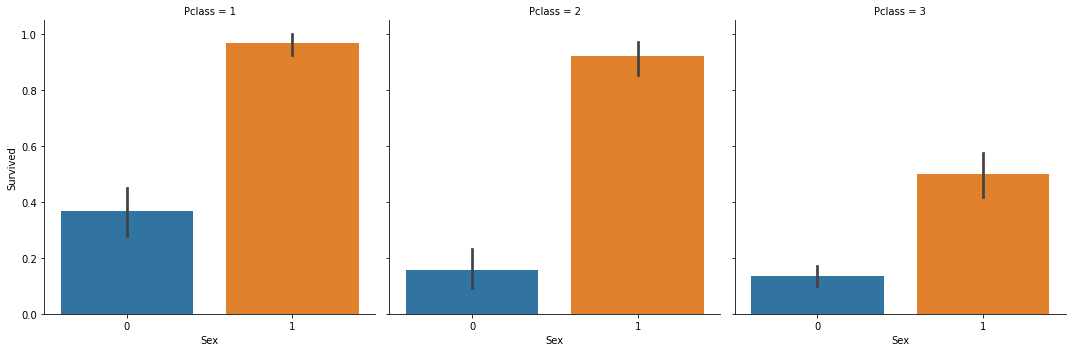

In [14]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=data, kind='bar')

Выживших мужчин среди 3-его класса меньше всего.

Выживаемость в зависимости от количества членов семьи (SibSp-количество супругов+родственников пассажира, Parch-количество детей+родителей пассажира):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


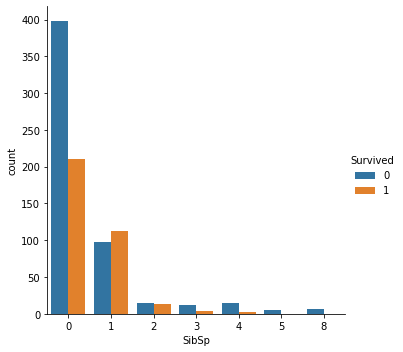

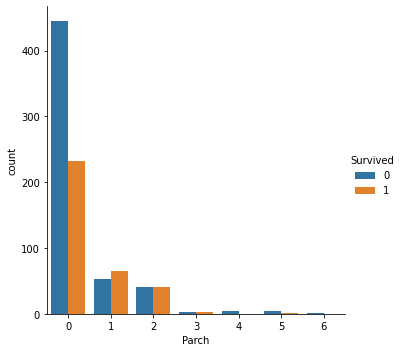

In [15]:
sns.catplot('SibSp', data=data, hue='Survived', kind='count')
sns.catplot('Parch', data=data, hue='Survived', kind='count')

Таким образом, выживаемость коррелирует с SibSp и Parch.

Создаем отдельный признак Family Size:

In [58]:
data['Family Size']=data['SibSp']+data['Parch']
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family Size
0,1,0,3,0,1,0,7.2500,S,1
1,2,1,1,1,1,0,71.2833,C,1
2,3,1,3,1,0,0,7.9250,S,0
3,4,1,1,1,1,0,53.1000,S,1
4,5,0,3,0,0,0,8.0500,S,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


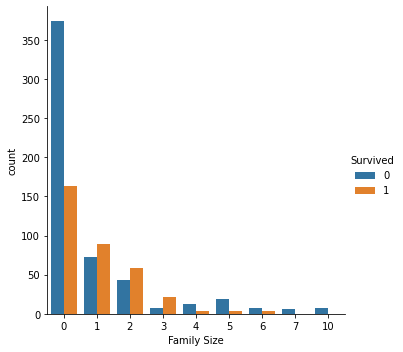

In [17]:
sns.catplot('Family Size', data=data, hue='Survived', kind='count')

Наблюдаем улучшенную корреляцию с выживаемостью.

Оставляем данный признак и убираем дублирующие.

In [59]:
data=data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Family Size
0,1,0,3,0,7.2500,S,1
1,2,1,1,1,71.2833,C,1
2,3,1,3,1,7.9250,S,0
3,4,1,1,1,53.1000,S,1
4,5,0,3,0,8.0500,S,0


Разделяем наши данные на тренировочную и тестовую выборки:

In [60]:
columns_target=['Survived']
columns_train=['Pclass', 'Sex', 'Fare', 'Family Size']
X=data[columns_train]
Y=data[columns_target]

In [61]:
from sklearn.model_selection import train_test_split

Несколько изменим нашу try_model функцию, чтобы она помогла вычислить средние и сформировать нам таблицу с результатами:


In [62]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler

def try_model(model, X_train, y_train, X_test, y_test, plot_flag=False, model_params=None):
    res = {}
    model_name = model.__name__
    res[model_name] = list()
    res[model_name].append([])
    res[model_name].append([])
    res[model_name].append([])
    res[model_name].append([])
    res[model_name].append([])
    res[model_name].append([])
   
    if model_params is None:
        model_params = dict()

    pipeline = make_pipeline(StandardScaler(), model(**model_params))

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    res[model_name][0].append(accuracy_score(y_test, y_pred))
    res[model_name][1].append(precision_score(y_test, y_pred))
    res[model_name][2].append(recall_score(y_test, y_pred))
    res[model_name][3].append(f1_score(y_test, y_pred))
    res[model_name][4].append(roc_auc_score(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    res[model_name][5].append(auc(fpr, tpr))
    
    if plot_flag:
        plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
        plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
        plt.legend()

        ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

    return res

In [ ]:
import warnings

f1_roc_auc = []
models = [LogisticRegression, SVC, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier, MLPClassifier]
idx = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score', 'auc']
n = 200

def dic_join(d1, d2):
    if d1 == {}:
        return d2
    else:
        for k in d1.keys():
            for i in range(6):
                d1[k][i] = d1[k][i] + d2[k][i]
        return d1
    
consolidic = {}
for i in range(1, n):
    results = {} 
    x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=i, stratify=Y)

    for m in models:
        if m == SVC:
            results.update(try_model(m, x_train, y_train, x_test, y_test, model_params=dict(
                kernel='linear',
                probability=True
            )))
        else:
            def kill_warning():
                results.update(try_model(m, x_train, y_train, x_test, y_test, model_params=None))
                warnings.warn("deprecated", DeprecationWarning)
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                kill_warning()
    consolidic = dic_join(consolidic, results)  

In [64]:
consolidic_avg = {}
for k in consolidic.keys():
    consolidic_avg[k] = [sum(consolidic[k][i]) / len(consolidic[k][i]) for i in range(6)]
rep_df = pd.DataFrame(data=consolidic_avg, index=idx)

# Итоговая таблица:

In [65]:
rep_df.style.background_gradient(axis=1)

,LogisticRegression,SVC,GaussianNB,KNeighborsClassifier,DecisionTreeClassifier,MLPClassifier
accuracy_score,0.801677,0.788855,0.795773,0.795457,0.802916,0.803209
precision_score,0.777094,0.746344,0.747424,0.754279,0.770780,0.794995
recall_score,0.684060,0.687332,0.713626,0.701414,0.699544,0.663550
f1_score,0.726469,0.714747,0.729026,0.725216,0.732114,0.721589
roc_auc_score,0.779784,0.769958,0.780483,0.777953,0.783675,0.777214
auc,0.837048,0.788696,0.828796,0.841786,0.788875,0.856988


Выведем ROC-кривые и матрицы ошибок для лучших моделей:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'MLPClassifier': [[0.8295964125560538],
  [0.875],
  [0.6511627906976745],
  [0.7466666666666667],
  [0.7963843150568664],
  [0.8906806993719233]]}

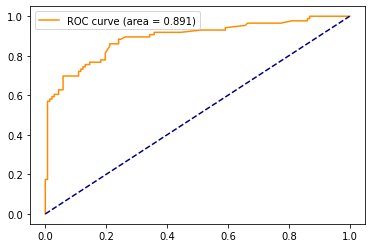

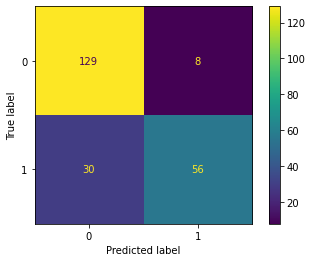

In [66]:
try_model(MLPClassifier, x_train, y_train, x_test, y_test, plot_flag=True, model_params=None)

{'DecisionTreeClassifier': [[0.8295964125560538],
  [0.8428571428571429],
  [0.686046511627907],
  [0.7564102564102564],
  [0.8028772704124936],
  [0.8049991512476661]]}

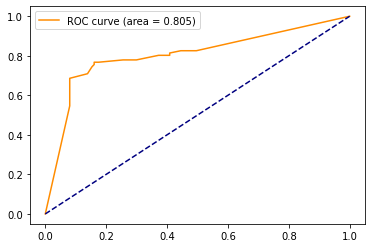

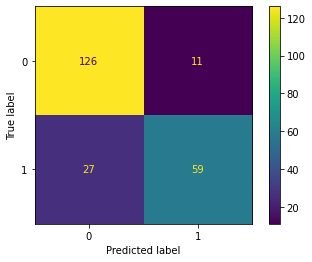

In [67]:
try_model(DecisionTreeClassifier, x_train, y_train, x_test, y_test, plot_flag=True, model_params=None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'LogisticRegression': [[0.8340807174887892],
  [0.8450704225352113],
  [0.6976744186046512],
  [0.7643312101910827],
  [0.8086912239008657],
  [0.8607197419792905]]}

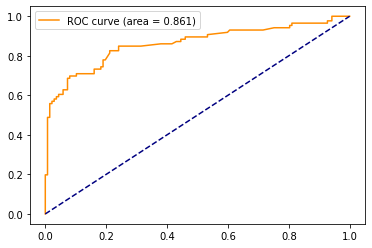

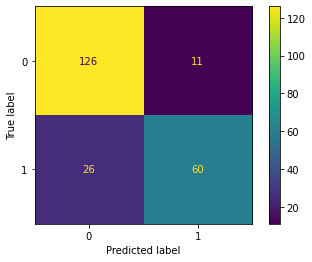

In [68]:
try_model(LogisticRegression, x_train, y_train, x_test, y_test, plot_flag=True, model_params=None)

* **accuracy_score** - показывает отношение "попаданий" (TP+TN) к общему количеству предсказаний

* **precision_score** (точность) - доля ожидаемых положительных событий, которые на самом деле являются положительными (TP / (TP+FP))

* **recall_score** (чувствительность) - доля положительных событий, которые вы правильно предсказали (TP / (TP+FN))

* **f1_score** - гармоническое среднее чувствительности и точности

* **Кривая рабочих характеристик приемника (ROC)** *является одним из наиболее эффективных показателей оценки, поскольку она отображает точность прогнозов для всего диапазона предельных значений. Наиболее важным параметром, который можно получить из кривой ROC, является площадь под кривой (AUC).*

***Таким образом, основываясь на AUC метрике и характере ROC-кривых, можем сделать вывод о том, что модель MLPClassifier является лучшей из представленных.***